# Synthetic map

In this notebook, we buid a synthetic map to double-check the reconstructed large-scale magnetic maps using a superposition of spherical harmonics.

From our ZDI maps we got a strong dipole and octupole component with opposed polarities. Althought there are other components that come into play, we are simply visualizing how the components of order 1 and 3 overlap in the stellar surface.


In [36]:
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.special import sph_harm

phi = np.linspace(0, np.pi, 100)
theta = np.linspace(0, 2*np.pi, 100)
phi, theta = np.meshgrid(phi, theta)

# The Cartesian coordinates of the unit sphere
x = np.sin(phi) * np.cos(theta)
y = np.sin(phi) * np.sin(theta)
z = np.cos(phi)

Now we can set the spherical harmonics coefficients. A few important points:

- We know from the ZDI maps that the dipole has a smal tilt of $10^o$. 

- That means we can tie the coefficients $C_{11}$ to $C_{10}$ using the fact that $(C_{11}/C_{10})^2 = \tan(\pi*10/180) = 0.17$.

- The dipole is negative in the north pole, so $C_{10}$ and $C_{11}$ are negative.


In [38]:
# For this example we can normalize the sum of the squares of the coefficients to 1.
# note that the condition C10 < 0.92 must be satisfied for C30 be real in this example.
C10 = -1/np.sqrt(2) 
C11 = C10*np.sqrt(0.17) 
C30 = np.sqrt(1 - 1.17*C10**2) 


# Calculate the spherical harmonic Y(l,m) and normalize to [0,1]
## Tilted dipole
m, l = 0, 1
fcolors = C10*sph_harm(m, l, theta, phi).real
m, l = 1, 1
fcolors += C11*sph_harm(m, l, theta, phi).real
## Aligned octupole
m, l = 0, 3
fcolors += C30*sph_harm(m, l, theta, phi).real


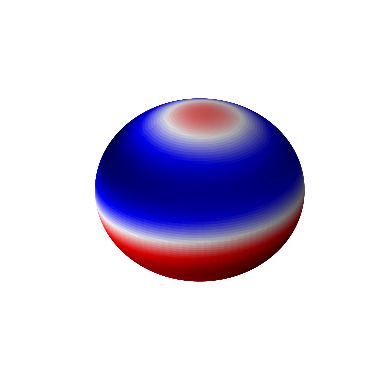

In [39]:
# Now we plot
fmax, fmin = fcolors.max(), fcolors.min()
fcolors = (fcolors - fmin)/(fmax - fmin)

# Set the aspect ratio to 1 so our sphere looks spherical
fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=cm.seismic(fcolors))
# Turn off the axis planes
ax.set_axis_off()
plt.show()